<a href="https://colab.research.google.com/github/rifka1/MSIBOrbit/blob/main/Tugas_Clustering_Kelompok_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Clustering (Kelompok)
Kelompok Amazon

Nama Anggota:

1. Rifka Fariyanti
2. Ghina Alya N  
3. Muhammad Hatami 
4. Dicky Ade
5. M. Patty Amal Madani
6. Boy Fransiskus 

Coba buat dendogram, model clustering, visualisasi hasil clustering, dan rata-rata per cluster, tapi dengan ketentuan :    

1. method/linkage='complete', affinity='manhattan' (jaraknya manhattan)
2. method/linkage='single', affinity='euclidean' (jaraknya euclidean)
3. method/linkage='average', affinity='euclidean' (jaraknya euclidean)
4. method/linkage='single', affinity='manhattan' (jaraknya manhattan)
5. method/linkage='average', affinity='manhattan' (jaraknya manhattan)

Disini kelompok kami menggunakan ketentuan ke 2, yaitu menggunakan method/linkage='single', affinity='euclidean' (jaraknya euclidean).

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
#Mengambil data dari dataframe untuk dijadikan vektor
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
X = StandardScaler().fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

##Membuat dendogram

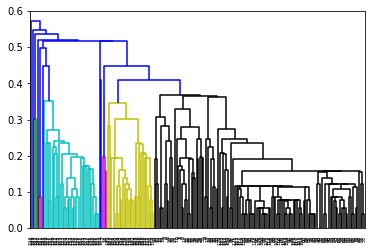

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

In [ ]:
agglo = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single')
agglo.fit(X)
labels_agglo = agglo.labels_
labels_agglo

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 6, 0, 6, 1, 4, 1,
       3, 5])

In [ ]:
data_hasil_cluster = data.copy()
data_hasil_cluster['data hasil clustering'] = labels_agglo
data_hasil_cluster

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_agglo,data hasil clustering
CustomerID,,,,,,
1,Male,19,15,39,1,2
2,Male,21,15,81,3,2
3,Female,20,16,6,1,2
4,Female,23,16,77,3,2
5,Female,31,17,40,1,2
...,...,...,...,...,...,...
196,Female,35,120,79,5,1
197,Female,45,126,28,6,4
198,Male,32,126,74,5,1


##Visualisasi hasil clustering  

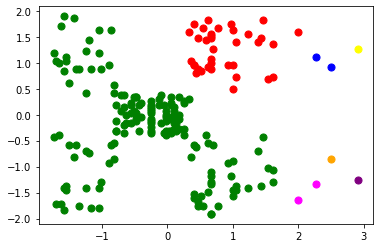

In [ ]:
plt.scatter(X[labels_agglo==0, 0], X[labels_agglo==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels_agglo==1, 0], X[labels_agglo==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels_agglo==2, 0], X[labels_agglo==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels_agglo==3, 0], X[labels_agglo==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels_agglo==4, 0], X[labels_agglo==4, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels_agglo==5, 0], X[labels_agglo==5, 1], s=50, marker='o', color='yellow')
plt.scatter(X[labels_agglo==6, 0], X[labels_agglo==6, 1], s=50, marker='o', color='magenta')
plt.show()

In [ ]:
#Menambahkan hasil clustering ke dataframe
data['cluster_agglo'] = labels_agglo
data

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_agglo
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,2
4,Female,23,16,77,2
5,Female,31,17,40,2
...,...,...,...,...,...
196,Female,35,120,79,1
197,Female,45,126,28,4
198,Male,32,126,74,1


##Rata-rata per cluster

In [ ]:
for i in range(max(labels_agglo)+1):
  print('cluster ke-', i)
  print('rata-rata pemasukan = ', data[data['cluster_agglo']==i]['Annual Income (k$)'].mean(),
        ', rata-rata pengeluaran = ', data[data['cluster_agglo']==i]['Spending Score (1-100)'].mean())

cluster ke- 0
rata-rata pemasukan =  83.11111111111111 , rata-rata pengeluaran =  82.41666666666667
cluster ke- 1
rata-rata pemasukan =  123.0 , rata-rata pengeluaran =  76.5
cluster ke- 2
rata-rata pemasukan =  52.49044585987261 , rata-rata pengeluaran =  43.10191082802548
cluster ke- 3
rata-rata pemasukan =  137.0 , rata-rata pengeluaran =  18.0
cluster ke- 4
rata-rata pemasukan =  126.0 , rata-rata pengeluaran =  28.0
cluster ke- 5
rata-rata pemasukan =  137.0 , rata-rata pengeluaran =  83.0
cluster ke- 6
rata-rata pemasukan =  116.5 , rata-rata pengeluaran =  12.0
